# Final Project - Supplemental Materials

### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### Read data

In [6]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'

In [7]:
df = pd.read_csv(data_url)

### Modify data

In [8]:
# modify 1.drop missing as shown in B.b.iii
df1 = df.dropna()

In [9]:
# modify 2.remove duplicate as stated in CMPINF 2100 - Final project feedback
df2 = df1.groupby(['track_id','track_album_id','playlist_id'],as_index=False).first()

In [10]:
df2.shape == df1.shape

False

In [11]:
# modify 3.transfer DATE variable as stated in CMPINF 2100 - Final project feedback
df2['track_album_release_date_dt'] = pd.to_datetime(df2.track_album_release_date,format='%Y-%m-%d', errors='coerce')

In [12]:
df2['release_year'] = df2.track_album_release_date_dt.dt.year


In [13]:
df2.columns

Index(['track_id', 'track_album_id', 'playlist_id', 'track_name',
       'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'track_album_release_date_dt',
       'release_year'],
      dtype='object')

In [14]:
# modify 4.transfer track_popularity in a regression problem as stated in CMPINF 2100 - Final project feedback
df2['track_pop_shift'] = np.where(df2.track_popularity == 100, df2.track_popularity - 0.1,df2.track_popularity)
df2['track_pop_shift'] = np.where(df2.track_popularity == 0, df2.track_popularity + 0.1,df2.track_popularity)

In [15]:
df2['track_pop_frac']=df2.track_pop_shift / 100

df2['y'] =np.log(df2.track_pop_frac / (1 - df2.track_pop_frac))

In [16]:
df2.columns

Index(['track_id', 'track_album_id', 'playlist_id', 'track_name',
       'track_artist', 'track_popularity', 'track_album_name',
       'track_album_release_date', 'playlist_name', 'playlist_genre',
       'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'track_album_release_date_dt',
       'release_year', 'track_pop_shift', 'track_pop_frac', 'y'],
      dtype='object')

In [17]:
# modify 5.split and choose part of the dataframe
df3 = df2.loc[df2.release_year == 2004, :]

In [18]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 148 to 32181
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   track_id                     328 non-null    object        
 1   track_album_id               328 non-null    object        
 2   playlist_id                  328 non-null    object        
 3   track_name                   328 non-null    object        
 4   track_artist                 328 non-null    object        
 5   track_popularity             328 non-null    int64         
 6   track_album_name             328 non-null    object        
 7   track_album_release_date     328 non-null    object        
 8   playlist_name                328 non-null    object        
 9   playlist_genre               328 non-null    object        
 10  playlist_subgenre            328 non-null    object        
 11  danceability                 328 non-null    f

# C. Clustering

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
from sklearn.decomposition import PCA

In [21]:
df3_copy = df3.copy()

In [22]:
df3_copy['key'] = df3.key.astype('object')

In [23]:
df3_copy['mode'] = df3.key.astype('object')

In [24]:
df3_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 148 to 32181
Data columns (total 28 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   track_id                     328 non-null    object        
 1   track_album_id               328 non-null    object        
 2   playlist_id                  328 non-null    object        
 3   track_name                   328 non-null    object        
 4   track_artist                 328 non-null    object        
 5   track_popularity             328 non-null    int64         
 6   track_album_name             328 non-null    object        
 7   track_album_release_date     328 non-null    object        
 8   playlist_name                328 non-null    object        
 9   playlist_genre               328 non-null    object        
 10  playlist_subgenre            328 non-null    object        
 11  danceability                 328 non-null    f

In [25]:
df4 = df3_copy.drop(columns = ['track_pop_shift','track_pop_frac','track_album_release_date_dt','release_year'])

In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 148 to 32181
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  328 non-null    object 
 1   track_album_id            328 non-null    object 
 2   playlist_id               328 non-null    object 
 3   track_name                328 non-null    object 
 4   track_artist              328 non-null    object 
 5   track_popularity          328 non-null    int64  
 6   track_album_name          328 non-null    object 
 7   track_album_release_date  328 non-null    object 
 8   playlist_name             328 non-null    object 
 9   playlist_genre            328 non-null    object 
 10  playlist_subgenre         328 non-null    object 
 11  danceability              328 non-null    float64
 12  energy                    328 non-null    float64
 13  key                       328 non-null    object 
 14  loudness   

In [27]:
df4_features = df4.drop(columns=['y','track_popularity']).select_dtypes('number').copy()

In [28]:
df4_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 148 to 32181
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      328 non-null    float64
 1   energy            328 non-null    float64
 2   loudness          328 non-null    float64
 3   speechiness       328 non-null    float64
 4   acousticness      328 non-null    float64
 5   instrumentalness  328 non-null    float64
 6   liveness          328 non-null    float64
 7   valence           328 non-null    float64
 8   tempo             328 non-null    float64
 9   duration_ms       328 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 28.2 KB


### Judge whether the continuous variables have vastly different scales

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


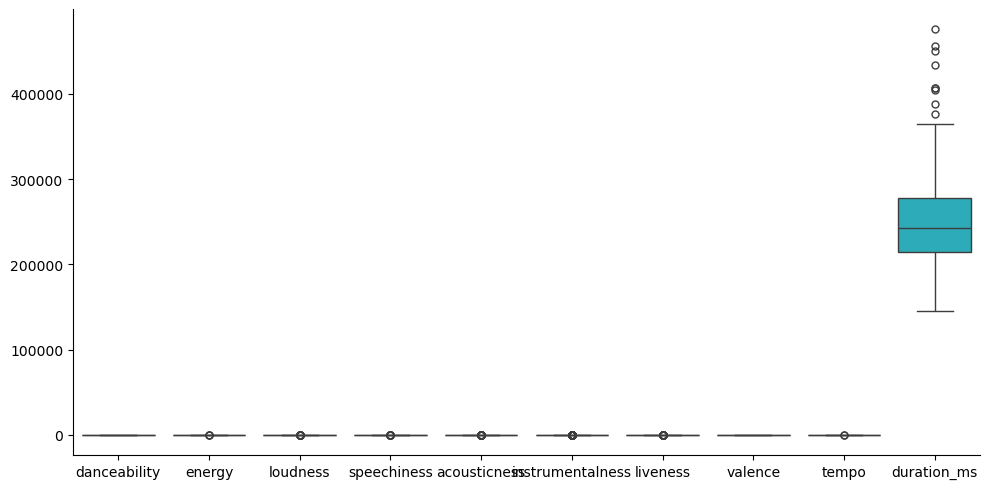

In [29]:

sns.catplot(data=df4_features, kind='box', aspect=2)
plt.show()

The continuous variables have vastly different scales, standardize the variables before clustering is needed.

### Standardize continuous variables

In [30]:
Xdf4 = StandardScaler().fit_transform(df4_features)

In [31]:
xdf4 = pd.DataFrame(Xdf4, columns = df4_features.columns)

In [32]:
xdf4

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.228518,-1.013955,-0.767625,-0.943733,1.303515,-0.210842,2.187045,-0.936229,0.028455,0.059377
1,-0.453146,0.101941,0.358667,-0.675642,-0.611601,-0.210842,-0.679626,-2.274030,-0.933172,1.500060
2,-0.703672,-0.244371,-1.458995,0.768784,-0.788545,0.190331,-0.309733,-0.338908,1.453963,-0.317121
3,-0.703672,-0.244371,-1.458995,0.768784,-0.788545,0.190331,-0.309733,-0.338908,1.453963,-0.317121
4,-0.849326,0.827549,0.563381,1.533530,0.529784,-0.210842,-0.053654,0.821178,0.976431,0.724371
...,...,...,...,...,...,...,...,...,...,...
323,-1.519337,1.234329,0.673867,-0.704857,-0.812472,-0.180955,-0.466227,-0.723958,-0.779263,-0.416850
324,1.114098,0.266852,-0.188220,-0.159224,-0.694844,4.214700,-0.082107,-1.642153,-0.719894,-0.723362
325,-0.820195,0.613165,0.877472,-0.709154,-0.503279,-0.210842,-0.437773,0.776749,-0.974514,-0.612667
326,-2.218480,-0.189401,-0.296489,-0.878429,-0.798043,-0.170035,-0.614895,-1.686582,0.251595,0.692511


vi.If your EDA revealed that the continuous variables have vastly different scales, you must standardize the variables before clustering. If your EDA revealed that the continuous inputs are highly correlated, consider clustering using the original variables.

The EDA revealed that the continuous inputs (energy-loudness, acousticness-energy) are highly correlated, consider clustering using the original variables.

In [33]:
## hierarchy cluster
from scipy.cluster import hierarchy

In [34]:
hclust_ward = hierarchy.ward(Xdf4)

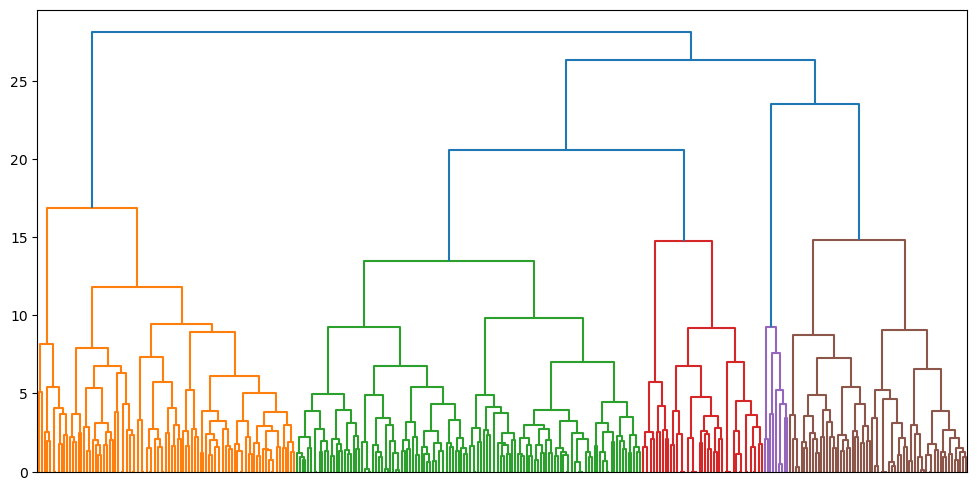

In [35]:
fig = plt.figure(figsize=(12,6))

dn = hierarchy.dendrogram(hclust_ward, no_labels=True)

plt.show()


Number of clusters could be 5.

In [36]:

np.unique(hierarchy.cut_tree(hclust_ward, n_clusters = 5).ravel())

array([0, 1, 2, 3, 4])

In [37]:
xdf4['hclust_5'] = pd.Series(hierarchy.cut_tree(hclust_ward, n_clusters=5).ravel(), index=xdf4.index).astype('category')

In [38]:
xdf4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      328 non-null    float64 
 1   energy            328 non-null    float64 
 2   loudness          328 non-null    float64 
 3   speechiness       328 non-null    float64 
 4   acousticness      328 non-null    float64 
 5   instrumentalness  328 non-null    float64 
 6   liveness          328 non-null    float64 
 7   valence           328 non-null    float64 
 8   tempo             328 non-null    float64 
 9   duration_ms       328 non-null    float64 
 10  hclust_5          328 non-null    category
dtypes: category(1), float64(10)
memory usage: 26.2 KB


In [39]:
xdf4.hclust_5

0      0
1      1
2      2
3      2
4      2
      ..
323    1
324    4
325    3
326    1
327    0
Name: hclust_5, Length: 328, dtype: category
Categories (5, int32): [0, 1, 2, 3, 4]

In [40]:
df4_copy = df4.copy()

In [41]:
df4_copy['hclust_5']=  pd.Series(hierarchy.cut_tree(hclust_ward, n_clusters=5).ravel(), index=df4_copy.index).astype('category')

In [42]:
df4_copy.hclust_5.value_counts()

hclust_5
3    122
0     91
1     63
2     43
4      9
Name: count, dtype: int64

In [43]:
df4_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 328 entries, 148 to 32181
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   track_id                  328 non-null    object  
 1   track_album_id            328 non-null    object  
 2   playlist_id               328 non-null    object  
 3   track_name                328 non-null    object  
 4   track_artist              328 non-null    object  
 5   track_popularity          328 non-null    int64   
 6   track_album_name          328 non-null    object  
 7   track_album_release_date  328 non-null    object  
 8   playlist_name             328 non-null    object  
 9   playlist_genre            328 non-null    object  
 10  playlist_subgenre         328 non-null    object  
 11  danceability              328 non-null    float64 
 12  energy                    328 non-null    float64 
 13  key                       328 non-null    object  


i.If you have a mix of continuous and categorical inputs in your data set, cluster the data based on the continuous inputs alone. After identifying the optimal number of clusters, compare the cluster assignments to unique values of several of the categorical inputs.

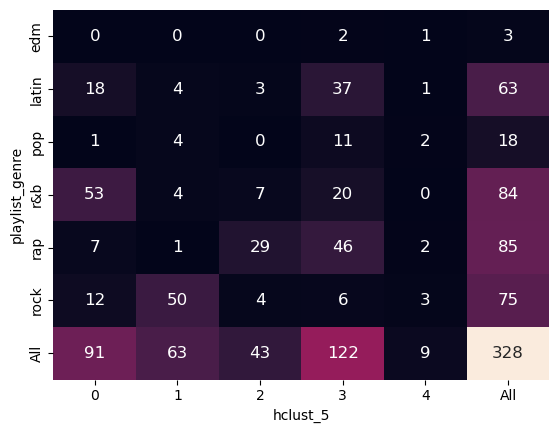

In [44]:
fig, ax=plt.subplots()

sns.heatmap(data=pd.crosstab(df4_copy.playlist_genre, df4_copy.hclust_5,margins=True),
           annot=True, annot_kws={'fontsize':12},fmt='g',
           cbar=False,ax=ax)

plt.show()

ii.Summarize the continuous inputs associated with each of the cluster assignments.

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


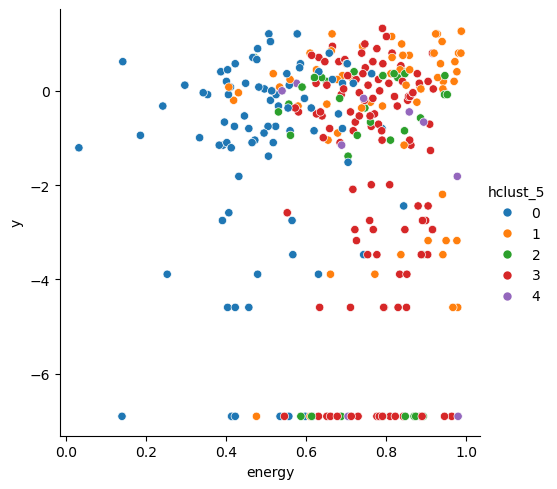

In [45]:
sns.relplot(data=df4_copy,x='energy',y='y',hue='hclust_5')

plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


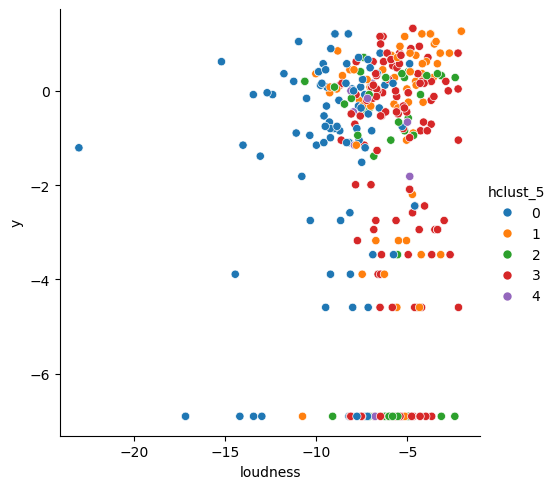

In [46]:
sns.relplot(data=df4_copy,x='loudness',y='y',hue='hclust_5')

plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


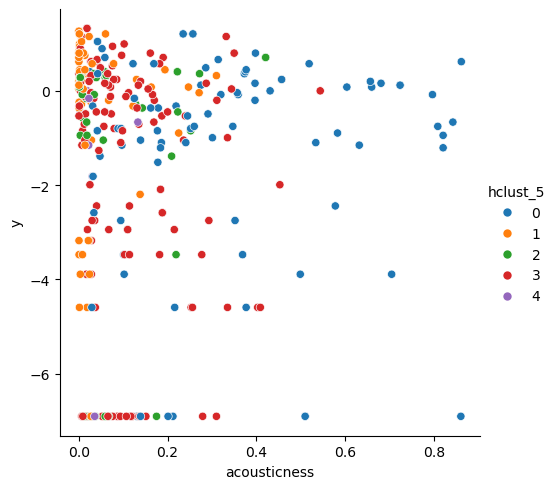

In [47]:

 sns.relplot(data=df4_copy,x='acousticness',y='y',hue='hclust_5')

plt.show()  

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


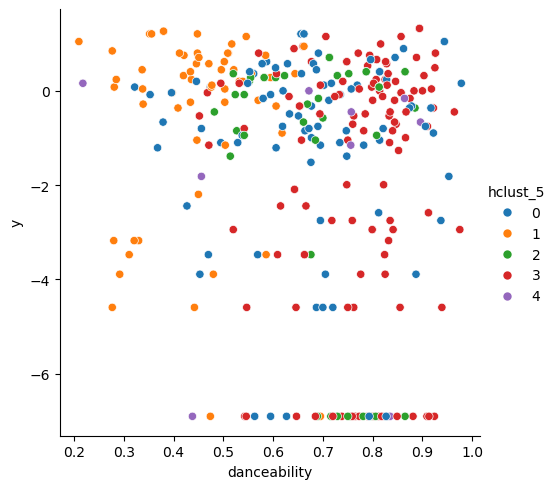

In [48]:
 sns.relplot(data=df4_copy,x='danceability',y='y',hue='hclust_5')

plt.show()  

### Considering PCA

In [49]:
df4_pca = PCA().fit_transform(Xdf4)

In [50]:
df4_pca.shape

(328, 10)

In [51]:
df4_pca_df = pd.DataFrame(df4_pca, columns = ['pc%02d' % d for d in range(1, df4_pca.shape[1]+1)])

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


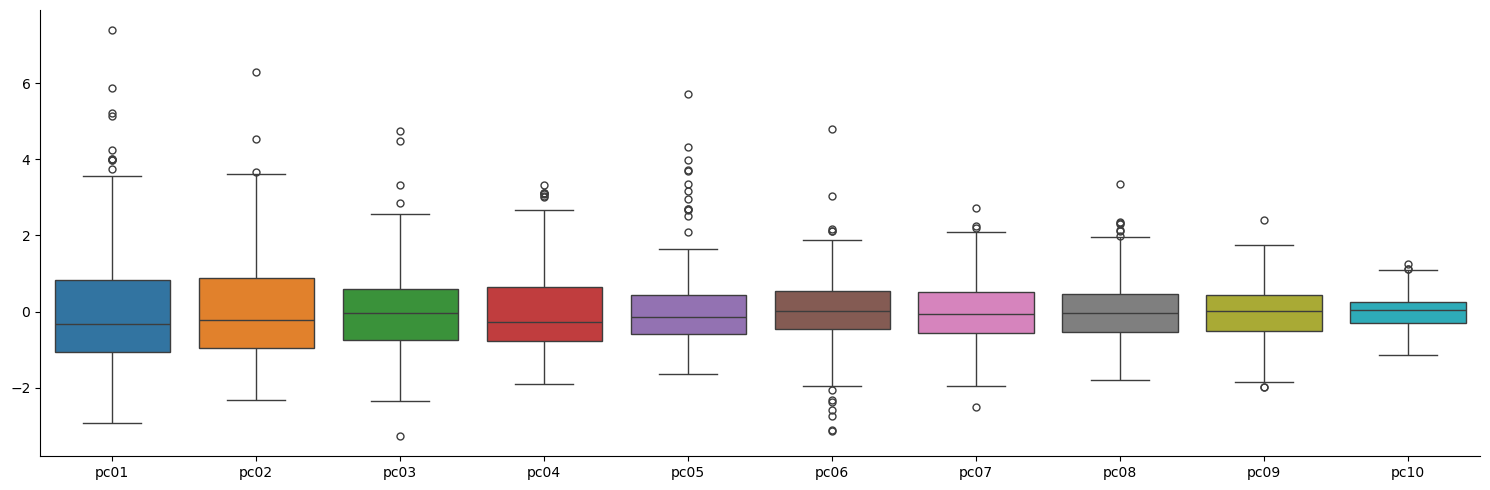

In [52]:
sns.catplot(data=df4_pca_df, kind='box', aspect=3)
plt.show()

In [53]:
df4_pca_df.describe().loc['std']

pc01    1.504850
pc02    1.343076
pc03    1.068284
pc04    1.057485
pc05    0.994100
pc06    0.917102
pc07    0.824101
pc08    0.773887
pc09    0.644047
pc10    0.424849
Name: std, dtype: float64

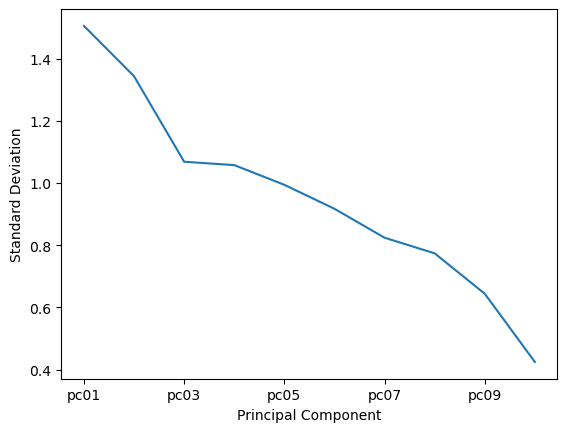

In [54]:
fig, ax=plt.subplots()

df4_pca_df.describe().loc['std'].plot(ax=ax)

ax.set_xlabel('Principal Component')
ax.set_ylabel('Standard Deviation')

plt.show()

In [55]:
# 3 components
df4_3pc = PCA(n_components=3).fit_transform(Xdf4)

In [56]:
df4_3pc.shape

(328, 3)

In [57]:
df4_3pc_df = pd.DataFrame(df4_3pc, columns=['pc01','pc02','pc03'])

In [58]:
df4_3pc_df.head()

,pc01,pc02,pc03
0,1.625399,0.540671,-1.189302
1,0.304716,1.671219,0.616833
2,0.351958,0.876471,0.345681
3,0.351958,0.876471,0.345681
4,-0.940342,0.171607,0.892822


# Models: Fitting and Interpretation

## Standardize

In [59]:
df5 = df4.copy().reset_index()

In [60]:

df5

,index,track_id,track_album_id,playlist_id,track_name,track_artist,track_popularity,track_album_name,track_album_release_date,playlist_name,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,y
0,148,02UYYPOGSBXxGEMce927XV,6GXk2hxl4q5GoPHarlUet8,3a9y4eeCJRmG9p4YKfqYIx,Nobody (feat. Athena Cage) - Single Version; 2...,Keith Sweat,45,The Best of Keith Sweat: Make You Sweat,2004-01-13,"Back in the day - R&B, New Jack Swing, Swingbe...",...,-8.753,9,0.0297,0.397000,0.00000,0.4830,0.412,117.896,251760,-0.200671
1,853,0Cw5iiA8OHWIhuIIA8u8N5,5VcOoSq5hMQb3bNa0sBKOe,5nQrMpkyWmxPX0gk74htMk,"Go Hard, Go Home (feat. Giz, Swellz & Choppa)",Roy Jones Jr.,57,"Body Head Bangerz, Vol. 1",2004-10-26,Hard Rock Workout!,...,-5.705,1,0.0609,0.038100,0.00000,0.0800,0.141,88.449,325333,0.281851
2,1045,0FMhMAFPLg8EljnROSoVnj,6ti1HC6R2Op1enYiuCDf6k,0QUlq0LMDVXSBtbyYLTyZh,La Grange - 1999 Remaster,ZZ Top,55,Rancho Texicano: The Very Best of ZZ Top,2004-06-08,Southern Rock/Classic Rock,...,-10.624,4,0.2290,0.004940,0.03490,0.1320,0.533,161.548,232533,0.200671
3,1046,0FMhMAFPLg8EljnROSoVnj,6ti1HC6R2Op1enYiuCDf6k,3sv5ViKoPDNnZRsklzEGMN,La Grange - 1999 Remaster,ZZ Top,55,Rancho Texicano: The Very Best of ZZ Top,2004-06-08,Hard Rock Cafe Classics,...,-10.624,4,0.2290,0.004940,0.03490,0.1320,0.533,161.548,232533,0.200671
4,1083,0FpF0xdbJDpIZ0wA2OjNku,1KushUovbraTDRu9sbO5fg,3R5c1OfJY7Rzl3p28pzGtL,Two Miles An Hour,Ludacris,30,The Red Light District,2004-01-01,Southern Hip Hop,...,-5.151,4,0.3180,0.252000,0.00000,0.1680,0.768,146.925,285720,-0.847298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,32114,7xyYsOvq5Ec3P4fr6mM9fD,0HcHPBu9aaF1MxOiZmUQTl,0dAbaJtkS9st5o0cBe1Zcu,Hysteria,Muse,69,Absolution,2004-03-23,"Muse Radio - (Uprising, Starlight, Supermassiv...",...,-4.852,9,0.0575,0.000456,0.00260,0.1100,0.455,93.162,227440,0.800119
324,32134,7yJj4umZ3DgeLU3LiU5TN3,01UJJt3Aregqk8jZMDPB5x,28Ke4pXWqF2A5b2GfQ1pQt,La Llamada,Cartel De Santa,46,Vol. II,2004-07-28,Mexican Gangsta Rap,...,-7.185,2,0.1210,0.022500,0.38500,0.1640,0.269,94.980,211787,-0.160343
325,32143,7yXibbAYi4to5oQTeO738f,0w11HUk0hE4WZ95Bvp6vNI,4TvZA7Pml7mHLgbwNomlnm,Pieces Of Me,Ashlee Simpson,54,Autobiography,2004-01-01,post-teen pop,...,-4.301,2,0.0570,0.058400,0.00000,0.1140,0.759,87.183,217440,0.160343
326,32160,7yi70YT2UBu5FpNLUUpkc6,4a92B7gXZWKJopxs6gWgqb,29dTrOurPDrMcrnio2q6hZ,Don't Cry (Original),Guns N' Roses,2,Greatest Hits,2004-01-01,80s / Classic Rock,...,-7.478,11,0.0373,0.003160,0.00355,0.0891,0.260,124.729,284093,-3.891820


In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
df5_co = df5.drop(columns = ['y','track_popularity','index']).select_dtypes('number').copy()

In [63]:
df5_ca = df5.loc[:,['key','mode','playlist_genre']]

In [64]:
df5_y = df5.loc[:,['y']]

In [65]:
df5_co

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.712,0.511,-8.753,0.0297,0.397000,0.00000,0.4830,0.412,117.896,251760
1,0.595,0.714,-5.705,0.0609,0.038100,0.00000,0.0800,0.141,88.449,325333
2,0.552,0.651,-10.624,0.2290,0.004940,0.03490,0.1320,0.533,161.548,232533
3,0.552,0.651,-10.624,0.2290,0.004940,0.03490,0.1320,0.533,161.548,232533
4,0.527,0.846,-5.151,0.3180,0.252000,0.00000,0.1680,0.768,146.925,285720
...,...,...,...,...,...,...,...,...,...,...
323,0.412,0.920,-4.852,0.0575,0.000456,0.00260,0.1100,0.455,93.162,227440
324,0.864,0.744,-7.185,0.1210,0.022500,0.38500,0.1640,0.269,94.980,211787
325,0.532,0.807,-4.301,0.0570,0.058400,0.00000,0.1140,0.759,87.183,217440
326,0.292,0.661,-7.478,0.0373,0.003160,0.00355,0.0891,0.260,124.729,284093


In [66]:
Xdf5_co = StandardScaler().fit_transform(df5_co)

In [67]:
xdf5_co = pd.DataFrame(Xdf5_co,columns=df5_co.columns)

In [68]:
df5_new = pd.concat([xdf5_co, df5_ca, df5_y], ignore_index=False,axis=1)

In [69]:
df5_new

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,key,mode,playlist_genre,y
0,0.228518,-1.013955,-0.767625,-0.943733,1.303515,-0.210842,2.187045,-0.936229,0.028455,0.059377,9,9,r&b,-0.200671
1,-0.453146,0.101941,0.358667,-0.675642,-0.611601,-0.210842,-0.679626,-2.274030,-0.933172,1.500060,1,1,rock,0.281851
2,-0.703672,-0.244371,-1.458995,0.768784,-0.788545,0.190331,-0.309733,-0.338908,1.453963,-0.317121,4,4,rock,0.200671
3,-0.703672,-0.244371,-1.458995,0.768784,-0.788545,0.190331,-0.309733,-0.338908,1.453963,-0.317121,4,4,rock,0.200671
4,-0.849326,0.827549,0.563381,1.533530,0.529784,-0.210842,-0.053654,0.821178,0.976431,0.724371,4,4,rap,-0.847298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-1.519337,1.234329,0.673867,-0.704857,-0.812472,-0.180955,-0.466227,-0.723958,-0.779263,-0.416850,9,9,rock,0.800119
324,1.114098,0.266852,-0.188220,-0.159224,-0.694844,4.214700,-0.082107,-1.642153,-0.719894,-0.723362,2,2,rap,-0.160343
325,-0.820195,0.613165,0.877472,-0.709154,-0.503279,-0.210842,-0.437773,0.776749,-0.974514,-0.612667,2,2,pop,0.160343
326,-2.218480,-0.189401,-0.296489,-0.878429,-0.798043,-0.170035,-0.614895,-1.686582,0.251595,0.692511,11,11,rock,-3.891820


## Fit using statsmodels

In [70]:
import statsmodels.formula.api as smf

In [71]:
df5_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      328 non-null    float64
 1   energy            328 non-null    float64
 2   loudness          328 non-null    float64
 3   speechiness       328 non-null    float64
 4   acousticness      328 non-null    float64
 5   instrumentalness  328 non-null    float64
 6   liveness          328 non-null    float64
 7   valence           328 non-null    float64
 8   tempo             328 non-null    float64
 9   duration_ms       328 non-null    float64
 10  key               328 non-null    object 
 11  mode              328 non-null    object 
 12  playlist_genre    328 non-null    object 
 13  y                 328 non-null    float64
dtypes: float64(11), object(3)
memory usage: 36.0+ KB


In [72]:
df5_new.rename(columns={'key': 'xa1', 'mode': 'xa2', 'playlist_genre': 'xa3'}, inplace=True)

In [73]:
df5_new.rename(columns={'danceability': 'xo1', 'energy': 'xo2', 'loudness': 'xo3', 'speechiness':'xo4','acousticness':'xo5','instrumentalness':'xo6','liveness':'xo7','valence':'xo8','tempo':'xo9','duration_ms':'xo10'}, inplace=True)

In [74]:
df5_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   xo1     328 non-null    float64
 1   xo2     328 non-null    float64
 2   xo3     328 non-null    float64
 3   xo4     328 non-null    float64
 4   xo5     328 non-null    float64
 5   xo6     328 non-null    float64
 6   xo7     328 non-null    float64
 7   xo8     328 non-null    float64
 8   xo9     328 non-null    float64
 9   xo10    328 non-null    float64
 10  xa1     328 non-null    object 
 11  xa2     328 non-null    object 
 12  xa3     328 non-null    object 
 13  y       328 non-null    float64
dtypes: float64(11), object(3)
memory usage: 36.0+ KB


**multiple models:**

6 must consider;

2 additional with all variables;

1 mode interesting model: partial variables based on view from EDA.

In [76]:
formula_list =  ['y ~ 1',
              'y ~ xa1 + xa2 + xa3',
              'y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10',
              'y ~ xa1 + xa2 + xa3 + xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10',
              'y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10)** 2',
              'y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10) * (xa1 + xa2 + xa3) ',
              'y ~ (xa1 + xa2 + xa3) + (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10 + np.power(xo1,2) +  np.power(xo2,2) + np.power(xo3,2) + np.power(xo4,2) + np.power(xo5,2) + np.power(xo6,2) + np.power(xo7,2) + np.power(xo8,2) + np.power(xo9,2) + np.power(xo10,2))',
              'y ~ (xa1 + xa2 + xa3) * (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10 + np.power(xo1,2) +  np.power(xo2,2) + np.power(xo3,2) + np.power(xo4,2) + np.power(xo5,2) + np.power(xo6,2) + np.power(xo7,2) + np.power(xo8,2) + np.power(xo9,2) + np.power(xo10,2))',
              'y ~ ( xa1 + xa3) * ( xo1 + xo4 + xo8 + xo9 + xo10 + np.power(xo1,2) + np.power(xo4,2) + np.power(xo8,2) + np.power(xo9,2) + np.power(xo10,2) + np.power(xo1,3) + np.power(xo4,3) + np.power(xo8,3) + np.power(xo9,3) + np.power(xo10,3))']

In [77]:
formula_list[8]

'y ~ ( xa1 + xa3) * ( xo1 + xo4 + xo8 + xo9 + xo10 + np.power(xo1,2) + np.power(xo4,2) + np.power(xo8,2) + np.power(xo9,2) + np.power(xo10,2) + np.power(xo1,3) + np.power(xo4,3) + np.power(xo8,3) + np.power(xo9,3) + np.power(xo10,3))'

In [78]:
fit_08 = smf.ols(formula=formula_list[8], data=df5_new).fit()

In [79]:
fit_08.params

Intercept                          8.652492
xa1[T.1]                         -10.484393
xa1[T.2]                          -6.095750
xa1[T.3]                          -0.813128
xa1[T.4]                          -2.090756
                                    ...    
xa3[T.latin]:np.power(xo10, 3)    -6.500625
xa3[T.pop]:np.power(xo10, 3)       2.631137
xa3[T.r&b]:np.power(xo10, 3)      -5.458016
xa3[T.rap]:np.power(xo10, 3)      -7.620536
xa3[T.rock]:np.power(xo10, 3)     -6.372842
Length: 272, dtype: float64

In [80]:
fit_08 = smf.ols(formula=formula_list[8], data=df5_new).fit()

In [81]:
print(fit_08.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.9893
Date:                Thu, 12 Dec 2024   Prob (F-statistic):              0.536
Time:                        20:37:05   Log-Likelihood:                -530.50
No. Observations:                 328   AIC:                             1565.
Df Residuals:                      76   BIC:                             2521.
Df Model:                         251                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

In [82]:
fit_08.pvalues < 0.05

Intercept                         False
xa1[T.1]                          False
xa1[T.2]                          False
xa1[T.3]                          False
xa1[T.4]                          False
                                  ...  
xa3[T.latin]:np.power(xo10, 3)    False
xa3[T.pop]:np.power(xo10, 3)      False
xa3[T.r&b]:np.power(xo10, 3)      False
xa3[T.rap]:np.power(xo10, 3)      False
xa3[T.rock]:np.power(xo10, 3)     False
Length: 272, dtype: bool

### Show coefficient with statistical significant

In [83]:
def my_coefplot(mod, figsize_use=(10, 10)):
    fig, ax=plt.subplots(figsize = figsize_use)
    ax.errorbar(y = mod.params.index,
               x = mod.params,
               xerr = 2 * mod.bse,
               fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    ax.set_xlabel('coefficient value')
    plt.show()

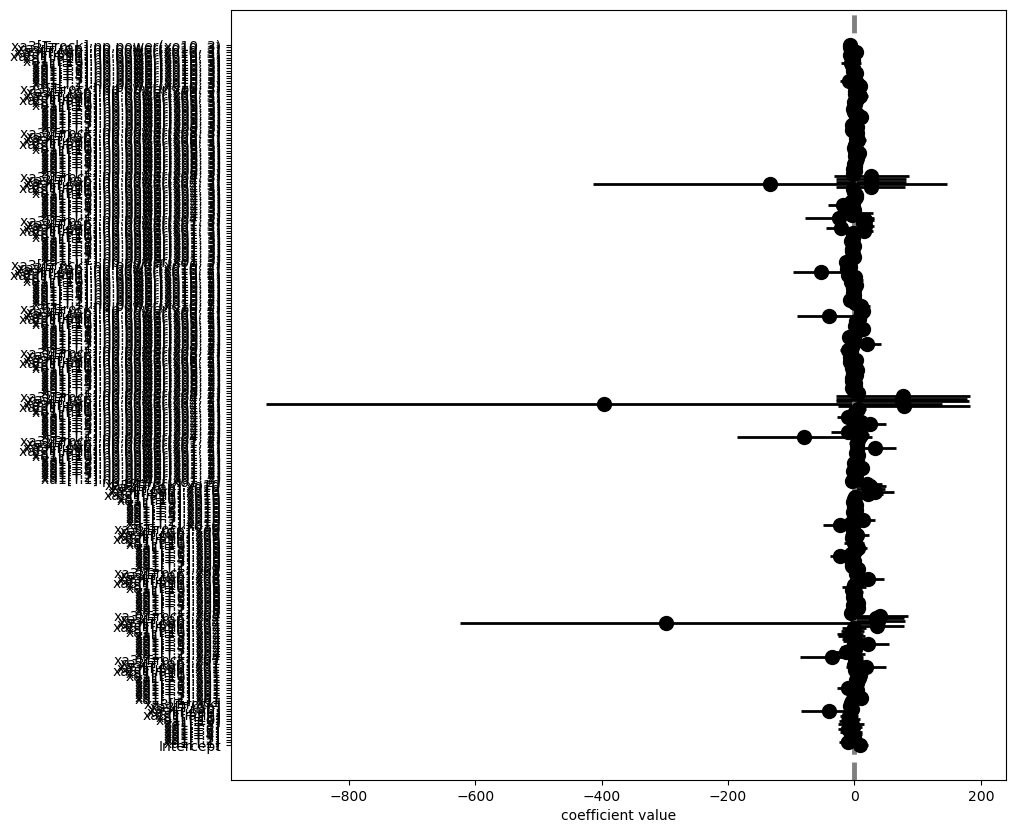

In [84]:
my_coefplot(fit_08)

### predicted vs observed figure

In [85]:
def my_pred_obs_plot(mod, figsize_use=(10,4)):
    df5_y = df5_new.loc[:,['y']].copy()
    df5_y['fitted'] = mod.fittedvalues
    fig, ax=plt.subplots(figsize = figsize_use)
    sns.scatterplot(data=df5_y, x='y', y='fitted', s=50, ax=ax)
    plt.show()

In [86]:
df5_y = df5_new.loc[:,['y']].copy()

In [87]:
df5_y['fitted'] = fit_08.fittedvalues

In [88]:
df5_y

,y,fitted
0,-0.200671,-0.674540
1,0.281851,-0.065884
2,0.200671,0.079190
3,0.200671,0.079190
4,-0.847298,0.272033
...,...,...
323,0.800119,-1.020644
324,-0.160343,-0.245623
325,0.160343,0.057694
326,-3.891820,-3.430294


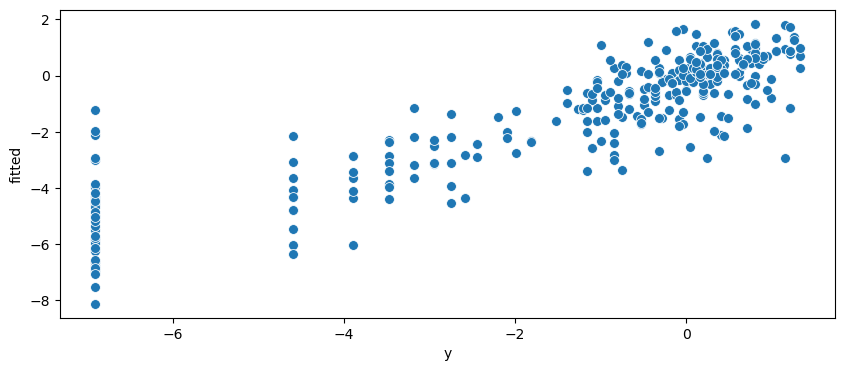

In [89]:
my_pred_obs_plot(fit_08)

### performance metric

In [90]:
def fit_and_assess_ols(mod_name, a_formula, the_data):
    a_mod = smf.ols(formula=a_formula, data=the_data).fit()
    res_dict = {'model_name':mod_name,
                'model_formula':a_formula,
               'num_coefs':len(a_mod.params),
               'R-squared':a_mod.rsquared,
               'RMSE':np.sqrt((a_mod.resid ** 2).mean())}
    return pd.DataFrame(res_dict, index=[0])

In [91]:
fit_and_assess_ols(0,formula_list[0], df5_new)

,model_name,model_formula,num_coefs,R-squared,RMSE
0,0,y ~ 1,1,0.0,2.519164


In [92]:
#apply to all formulas:

ols_results_list = []

for m in range(len(formula_list)):
    ols_results_list.append(fit_and_assess_ols(m, formula_list[m], df5_new))

In [93]:
#combine all model results together
ols_results_df = pd.concat(ols_results_list, ignore_index=True)

In [94]:
ols_results_df

,model_name,model_formula,num_coefs,R-squared,RMSE
0,0,y ~ 1,1,0.000000,2.519164
1,1,y ~ xa1 + xa2 + xa3,28,0.063357,2.438055
2,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11,0.095695,2.395598
3,3,y ~ xa1 + xa2 + xa3 + xo1 + xo2 + xo3 + xo4 + ...,38,0.135581,2.342171
4,4,y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 +...,56,0.216473,2.229890
5,5,y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 +...,308,0.538940,1.710547
6,6,y ~ (xa1 + xa2 + xa3) + (xo1 + xo2 + xo3 + xo4...,48,0.150192,2.322292
7,7,y ~ (xa1 + xa2 + xa3) * (xo1 + xo2 + xo3 + xo4...,588,0.960028,0.503654
8,8,y ~ ( xa1 + xa3) * ( xo1 + xo4 + xo8 + xo9 + x...,272,0.765652,1.219514


In [95]:
ols_results_df.sort_values(by=['R-squared'],ascending=False)

,model_name,model_formula,num_coefs,R-squared,RMSE
7,7,y ~ (xa1 + xa2 + xa3) * (xo1 + xo2 + xo3 + xo4...,588,0.960028,0.503654
8,8,y ~ ( xa1 + xa3) * ( xo1 + xo4 + xo8 + xo9 + x...,272,0.765652,1.219514
5,5,y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 +...,308,0.538940,1.710547
4,4,y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 +...,56,0.216473,2.229890
6,6,y ~ (xa1 + xa2 + xa3) + (xo1 + xo2 + xo3 + xo4...,48,0.150192,2.322292
3,3,y ~ xa1 + xa2 + xa3 + xo1 + xo2 + xo3 + xo4 + ...,38,0.135581,2.342171
2,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11,0.095695,2.395598
1,1,y ~ xa1 + xa2 + xa3,28,0.063357,2.438055
0,0,y ~ 1,1,0.000000,2.519164


In [96]:
ols_results_df.sort_values(by=['RMSE'],ascending=True)

,model_name,model_formula,num_coefs,R-squared,RMSE
7,7,y ~ (xa1 + xa2 + xa3) * (xo1 + xo2 + xo3 + xo4...,588,0.960028,0.503654
8,8,y ~ ( xa1 + xa3) * ( xo1 + xo4 + xo8 + xo9 + x...,272,0.765652,1.219514
5,5,y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 +...,308,0.538940,1.710547
4,4,y ~ (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 +...,56,0.216473,2.229890
6,6,y ~ (xa1 + xa2 + xa3) + (xo1 + xo2 + xo3 + xo4...,48,0.150192,2.322292
3,3,y ~ xa1 + xa2 + xa3 + xo1 + xo2 + xo3 + xo4 + ...,38,0.135581,2.342171
2,2,y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + ...,11,0.095695,2.395598
1,1,y ~ xa1 + xa2 + xa3,28,0.063357,2.438055
0,0,y ~ 1,1,0.000000,2.519164


Which model has the best performance on the training set? Is the best model according to R-squared the SAME as the best model according to RMSE? Is the best model better than the INTERCEPT-ONLY model? How many coefficients are associated with the BEST model?

Still, model 7 is the best on training data.

# E. Models: Predicitions

In [97]:
# the model with ALL inputs and linear additive features.
formula_list[3]

'y ~ xa1 + xa2 + xa3 + xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10'

In [98]:
# the best model on the training set
formula_list[7]

'y ~ (xa1 + xa2 + xa3) * (xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10 + np.power(xo1,2) +  np.power(xo2,2) + np.power(xo3,2) + np.power(xo4,2) + np.power(xo5,2) + np.power(xo6,2) + np.power(xo7,2) + np.power(xo8,2) + np.power(xo9,2) + np.power(xo10,2))'

In [99]:
# the intersted model on the training set
formula_list[8]

'y ~ ( xa1 + xa3) * ( xo1 + xo4 + xo8 + xo9 + xo10 + np.power(xo1,2) + np.power(xo4,2) + np.power(xo8,2) + np.power(xo9,2) + np.power(xo10,2) + np.power(xo1,3) + np.power(xo4,3) + np.power(xo8,3) + np.power(xo9,3) + np.power(xo10,3))'

## grid 1

You must identify the continuous input that you feel is the MOST important based on the statistically significant coefficients in your models. 

1.The MOST important input must have 101 unique values between the minimum and maximum training set values.

2.ALL other inputs must be set to CONSTANT values. Continuous inputs should use a CENTRAL value like the MEAN or MEDIAN. Categorical inputs should use the MOST frequent category.

In [100]:
input_grid = pd.DataFrame({'xo3' : np.linspace(df5_new.xo3.min(), df5_new.xo3.max(), num=101)})

In [101]:
input_grid['xo1'] = df5_new.xo1.mean()

In [102]:
input_grid['xo2'] = df5_new.xo2.mean()

In [103]:
input_grid['xo4'] = df5_new.xo4.mean()

In [104]:
input_grid['xo5'] = df5_new.xo5.mean()

In [105]:
input_grid['xo6'] = df5_new.xo6.mean()

In [106]:
input_grid['xo7'] = df5_new.xo7.mean()

In [107]:
input_grid['xo8'] = df5_new.xo8.mean()

In [108]:
input_grid['xo9'] = df5_new.xo9.mean()

In [109]:
input_grid['xo10'] = df5_new.xo10.mean()

In [110]:
input_grid['xa3'] = df5_new.xa3.value_counts().idxmax()

In [111]:
input_grid['xa1'] = df5_new.xa1.value_counts().idxmax()

In [112]:
input_grid['xa2'] = df5_new.xa2.value_counts().idxmax()

In [113]:
input_grid

,xo3,xo1,xo2,xo4,xo5,xo6,xo7,xo8,xo9,xo10,xa3,xa1,xa2
0,-6.037331,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
1,-5.959835,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
2,-5.882340,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
3,-5.804844,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
4,-5.727349,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1.402232,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
97,1.479728,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
98,1.557223,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1
99,1.634719,-5.415722e-18,-9.883693e-17,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,rap,1,1


In [114]:
input_grid.nunique()

xo3     101
xo1       1
xo2       1
xo4       1
xo5       1
xo6       1
xo7       1
xo8       1
xo9       1
xo10      1
xa3       1
xa1       1
xa2       1
dtype: int64

3.Make predictions with BOTH models on the visualization grid. You MUST visualize the AVERAGE OUTPUT as a line, the CONFIDENCE INTERVAL as a grey ribbon, and the PREDICTION INTERVAL as an orange ribbon with respect to the most important input. 

In [115]:
pred_summary_08 = fit_08.get_prediction(input_grid).summary_frame()

In [116]:
pred_summary_08.head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,-8.403337,2.64057,-13.662489,-3.144186,-15.691639,-1.115036
1,-8.403337,2.64057,-13.662489,-3.144186,-15.691639,-1.115036
2,-8.403337,2.64057,-13.662489,-3.144186,-15.691639,-1.115036
3,-8.403337,2.64057,-13.662489,-3.144186,-15.691639,-1.115036
4,-8.403337,2.64057,-13.662489,-3.144186,-15.691639,-1.115036


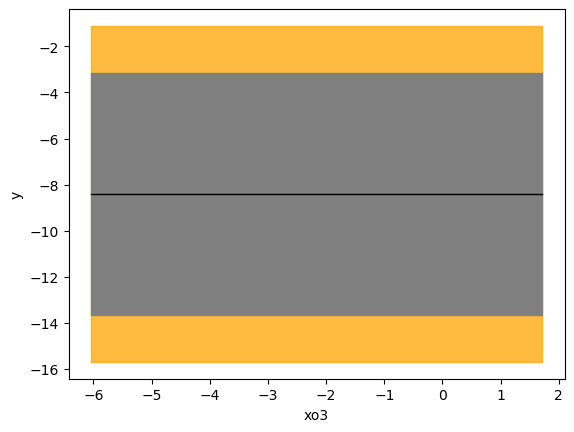

In [117]:
fig, ax = plt.subplots()

# prediction interval
ax.fill_between(input_grid.xo3,
               pred_summary_08.obs_ci_lower,
               pred_summary_08.obs_ci_upper,
               facecolor='orange', alpha=0.75, edgecolor='orange')
#confidence interval
ax.fill_between(input_grid.xo3,
               pred_summary_08.mean_ci_lower,
               pred_summary_08.mean_ci_upper,
               facecolor='grey',edgecolor='grey')
#trend
ax.plot(input_grid.xo3, pred_summary_08['mean'], color='k', linewidth=1)

#set labels
ax.set_xlabel('xo3')
ax.set_ylabel('y')

plt.show()

## grid 2

choose xo2, xo3, xa3 as inputs

In [118]:
input_grid2 = pd.DataFrame([(xo3n, xo2n)  for xo3n in np.linspace(df5_new.xo3.min(), df5_new.xo3.max(), num=101)
                                       for xo2n in np.linspace(df5_new.xo2.min(), df5_new.xo2.max(), num=5)],
                           columns=['xo3n','xo2n'])

In [119]:
xa3n = df5_new.xa3.unique()

In [120]:
viz_grid2 = pd.DataFrame({'xo3' : np.repeat(input_grid2.xo3n,len(xa3n)),
                         'xo2' : np.repeat(input_grid2.xo2n,len(xa3n)),
                         'xa3' : np.tile(xa3n,len(input_grid2.xo3n))})

In [121]:
viz_grid2.nunique()

xo3    101
xo2      5
xa3      6
dtype: int64

In [122]:
viz_grid2['xo1'] = df5_new.xo1.mean()

In [123]:
viz_grid2['xo4'] = df5_new.xo4.mean()

In [124]:
viz_grid2['xo5'] = df5_new.xo5.mean()

In [125]:
viz_grid2['xo6'] = df5_new.xo6.mean()

In [126]:
viz_grid2['xo7'] = df5_new.xo7.mean()

In [127]:
viz_grid2['xo8'] = df5_new.xo8.mean()

In [128]:
viz_grid2['xo9'] = df5_new.xo9.mean()

In [129]:
viz_grid2['xo10'] = df5_new.xo10.mean()

In [130]:
viz_grid2['xa1'] =  df5_new.xa1.value_counts().idxmax()

In [131]:
viz_grid2['xa2'] =  df5_new.xa2.value_counts().idxmax()

In [132]:
viz_grid2

,xo3,xo2,xa3,xo1,xo4,xo5,xo6,xo7,xo8,xo9,xo10,xa1,xa2
0,-6.037331,-3.645383,r&b,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
0,-6.037331,-3.645383,rock,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
0,-6.037331,-3.645383,rap,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
0,-6.037331,-3.645383,latin,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
0,-6.037331,-3.645383,edm,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1.712214,1.608127,rock,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
504,1.712214,1.608127,rap,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
504,1.712214,1.608127,latin,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1
504,1.712214,1.608127,edm,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1


In [133]:
viz_grid2.nunique()

xo3     101
xo2       5
xa3       6
xo1       1
xo4       1
xo5       1
xo6       1
xo7       1
xo8       1
xo9       1
xo10      1
xa1       1
xa2       1
dtype: int64

In [134]:
viz_grid2['pred08'] = fit_08.predict(viz_grid2)

In [135]:
viz_grid2

,xo3,xo2,xa3,xo1,xo4,xo5,xo6,xo7,xo8,xo9,xo10,xa1,xa2,pred08
0,-6.037331,-3.645383,r&b,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-5.820952
0,-6.037331,-3.645383,rock,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-6.765117
0,-6.037331,-3.645383,rap,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-8.403337
0,-6.037331,-3.645383,latin,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-8.933501
0,-6.037331,-3.645383,edm,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-1.831901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,1.712214,1.608127,rock,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-6.765117
504,1.712214,1.608127,rap,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-8.403337
504,1.712214,1.608127,latin,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-8.933501
504,1.712214,1.608127,edm,-5.415722e-18,-1.245616e-16,7.582011e-17,0.0,-1.326852e-16,2.707861e-16,3.682691e-16,5.551115e-17,1,1,-1.831901


C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


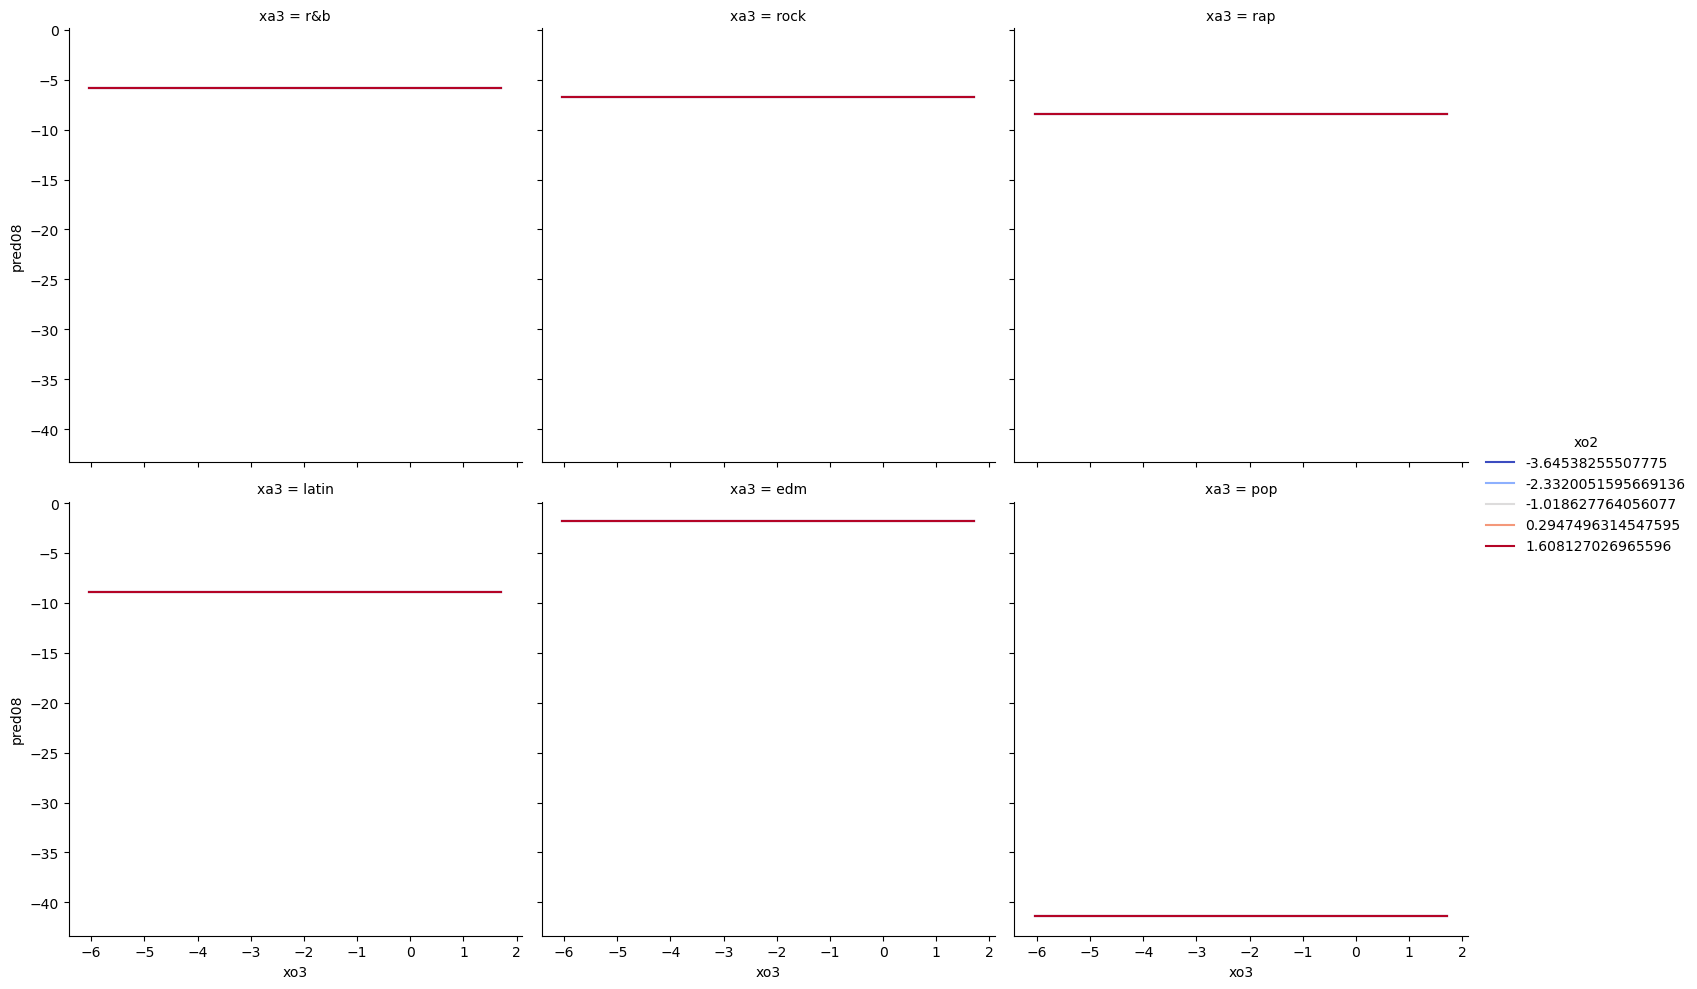

In [136]:
sns.relplot(data=viz_grid2,
           x='xo3', y = 'pred08', kind='line',
           hue='xo2',palette='coolwarm',col='xa3', col_wrap=3,
           estimator=None, units='xo2')
plt.show()

C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


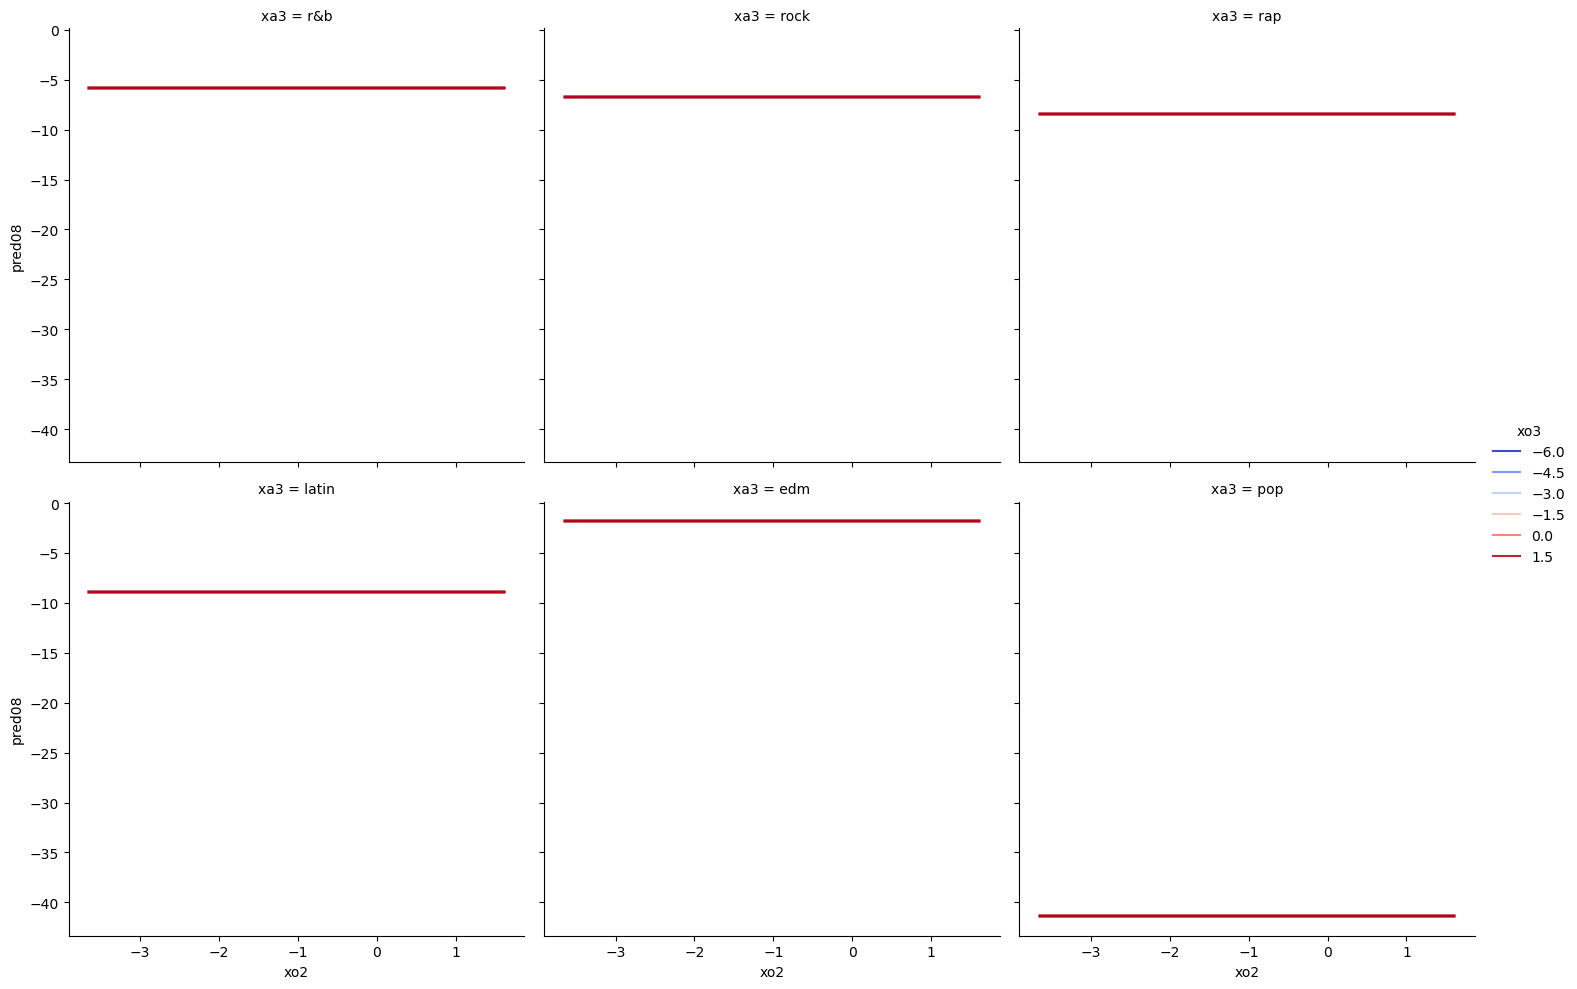

In [137]:
sns.relplot(data=viz_grid2,
           x='xo2', y = 'pred08', kind='line',
           hue='xo3',palette='coolwarm',col='xa3', col_wrap=3,
           estimator=None, units='xo3')
plt.show()

# F. Model performance and validation

In [138]:
df5_new

,xo1,xo2,xo3,xo4,xo5,xo6,xo7,xo8,xo9,xo10,xa1,xa2,xa3,y
0,0.228518,-1.013955,-0.767625,-0.943733,1.303515,-0.210842,2.187045,-0.936229,0.028455,0.059377,9,9,r&b,-0.200671
1,-0.453146,0.101941,0.358667,-0.675642,-0.611601,-0.210842,-0.679626,-2.274030,-0.933172,1.500060,1,1,rock,0.281851
2,-0.703672,-0.244371,-1.458995,0.768784,-0.788545,0.190331,-0.309733,-0.338908,1.453963,-0.317121,4,4,rock,0.200671
3,-0.703672,-0.244371,-1.458995,0.768784,-0.788545,0.190331,-0.309733,-0.338908,1.453963,-0.317121,4,4,rock,0.200671
4,-0.849326,0.827549,0.563381,1.533530,0.529784,-0.210842,-0.053654,0.821178,0.976431,0.724371,4,4,rap,-0.847298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,-1.519337,1.234329,0.673867,-0.704857,-0.812472,-0.180955,-0.466227,-0.723958,-0.779263,-0.416850,9,9,rock,0.800119
324,1.114098,0.266852,-0.188220,-0.159224,-0.694844,4.214700,-0.082107,-1.642153,-0.719894,-0.723362,2,2,rap,-0.160343
325,-0.820195,0.613165,0.877472,-0.709154,-0.503279,-0.210842,-0.437773,0.776749,-0.974514,-0.612667,2,2,pop,0.160343
326,-2.218480,-0.189401,-0.296489,-0.878429,-0.798043,-0.170035,-0.614895,-1.686582,0.251595,0.692511,11,11,rock,-3.891820


In [139]:
from sklearn.model_selection import KFold

In [140]:
from sklearn.linear_model import LinearRegression

In [141]:
from sklearn.model_selection import cross_val_score

In [142]:
from patsy import dmatrices

In [143]:
kf = KFold(n_splits=10, shuffle=True, random_state=101)

In [144]:
kf.get_n_splits()

10

In [145]:
sk_lm = LinearRegression(fit_intercept=False)

In [146]:
def lm_cross_val_score(mod_name, a_formula, init_mod, the_data, cv):
    #create features and output arrays
    y, X = dmatrices(a_formula, data=the_data)
    #train and test within each fold: return thest set scores
    ##rsquared
    test_r2 = cross_val_score(init_mod, X, y.ravel(), cv=cv)
    ##rmse
    test_rmse = -cross_val_score(init_mod, X, y.ravel(), cv=cv, scoring = 'neg_root_mean_squared_error')
    #book keeping
    res_df = pd.DataFrame({'R-squared': test_r2,
                         'RMSE': test_rmse})
    res_df['fold_id'] = res_df.index + 1
    res_df['model_name'] = mod_name
    res_df['model_formula'] = a_formula
    res_df['num_coefs'] = X.shape[1]
    return res_df

In [147]:
cv_score_list2 = []

In [148]:
for m in range(len(formula_list)):
    print('--Formula ID :%d --' % m)
    cv_score_list2.append(lm_cross_val_score(m, formula_list[m],init_mod=sk_lm,the_data=df5_new,cv=kf))

--Formula ID :0 --
--Formula ID :1 --
--Formula ID :2 --
--Formula ID :3 --
--Formula ID :4 --
--Formula ID :5 --
--Formula ID :6 --
--Formula ID :7 --
--Formula ID :8 --


In [149]:
cv_score_df2 = pd.concat(cv_score_list2, ignore_index=True)

C:\Users\russell\AppData\Local\Temp\ipykernel_10436\1742786585.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df2, x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',95))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


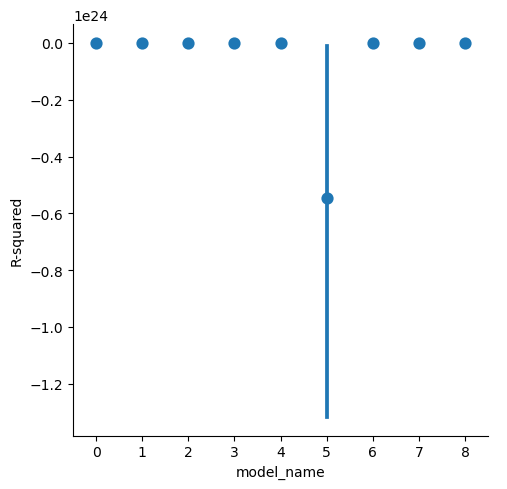

In [150]:
sns.catplot(data=cv_score_df2, x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',95))
plt.show()

C:\Users\russell\AppData\Local\Temp\ipykernel_10436\2074639170.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df2, x='model_name', y='RMSE', kind='point', join=False, errorbar=('ci',95))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


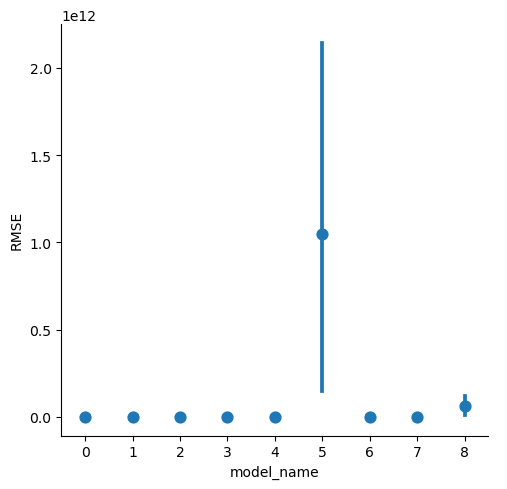

In [151]:
sns.catplot(data=cv_score_df2, x='model_name', y='RMSE', kind='point', join=False, errorbar=('ci',95))
plt.show()

C:\Users\russell\AppData\Local\Temp\ipykernel_10436\4120988666.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df2.loc[(cv_score_df2.model_name != 5) ,:], x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',95))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


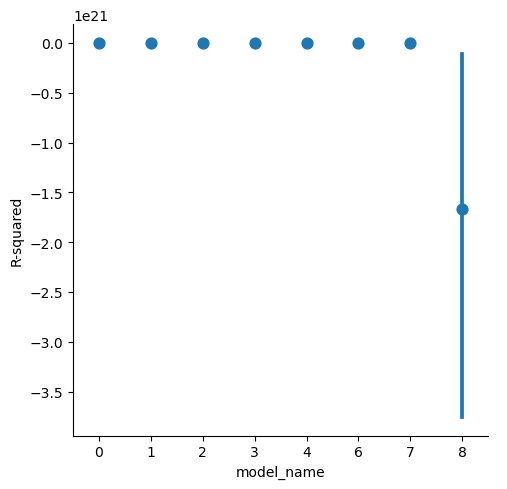

In [152]:
sns.catplot(data=cv_score_df2.loc[(cv_score_df2.model_name != 5) ,:], x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',95))
plt.show()

C:\Users\russell\AppData\Local\Temp\ipykernel_10436\1618510445.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df2.loc[(cv_score_df2.model_name != 5) & (cv_score_df2.model_name != 8),:], x='model_name', y='RMSE', kind='point', join=False, errorbar=('ci',95))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


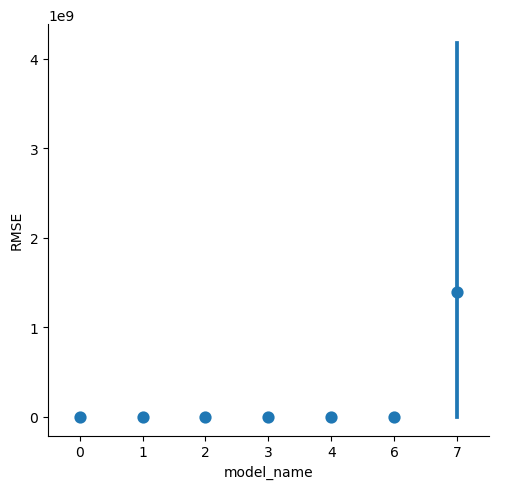

In [153]:
sns.catplot(data=cv_score_df2.loc[(cv_score_df2.model_name != 5) & (cv_score_df2.model_name != 8),:], x='model_name', y='RMSE', kind='point', join=False, errorbar=('ci',95))
plt.show()

C:\Users\russell\AppData\Local\Temp\ipykernel_10436\2165562538.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df2.loc[(cv_score_df2.model_name != 5) & (cv_score_df2.model_name != 8) & (cv_score_df2.model_name != 7),:], x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',68))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


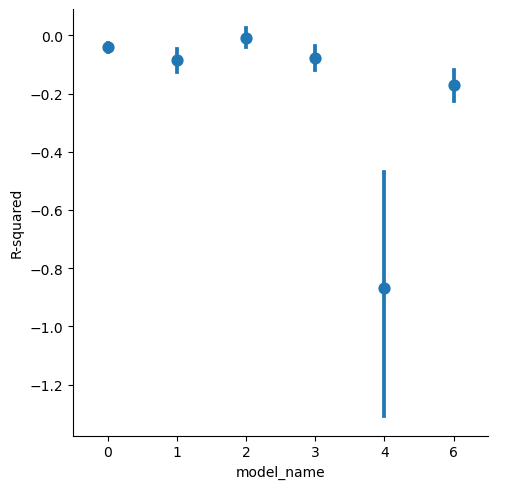

In [154]:
sns.catplot(data=cv_score_df2.loc[(cv_score_df2.model_name != 5) & (cv_score_df2.model_name != 8) & (cv_score_df2.model_name != 7),:], x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',68))
plt.show()

C:\Users\russell\AppData\Local\Temp\ipykernel_10436\1923169818.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df2.loc[(cv_score_df2.model_name != 4) & (cv_score_df2.model_name != 5) & (cv_score_df2.model_name != 7) & (cv_score_df2.model_name != 8),:], x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',68))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


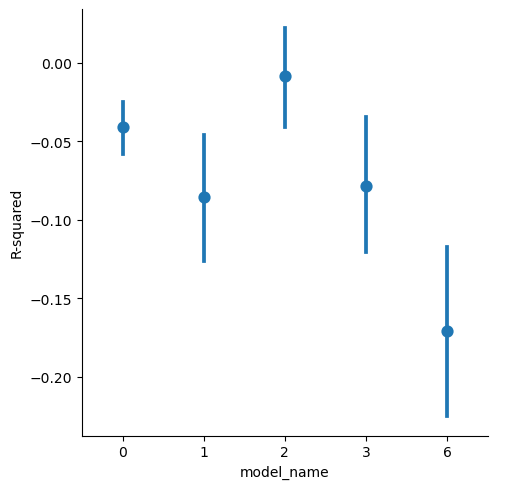

In [155]:
sns.catplot(data=cv_score_df2.loc[(cv_score_df2.model_name != 4) & (cv_score_df2.model_name != 5) & (cv_score_df2.model_name != 7) & (cv_score_df2.model_name != 8),:], x='model_name', y='R-squared', kind='point', join=False, errorbar=('ci',68))
plt.show()

C:\Users\russell\AppData\Local\Temp\ipykernel_10436\3859857501.py:1: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  sns.catplot(data=cv_score_df2.loc[(cv_score_df2.model_name != 4) & (cv_score_df2.model_name != 5) & (cv_score_df2.model_name != 7) & (cv_score_df2.model_name != 8),:], x='model_name', y='RMSE', kind='point', join=False, errorbar=('ci',68))
C:\Users\russell\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


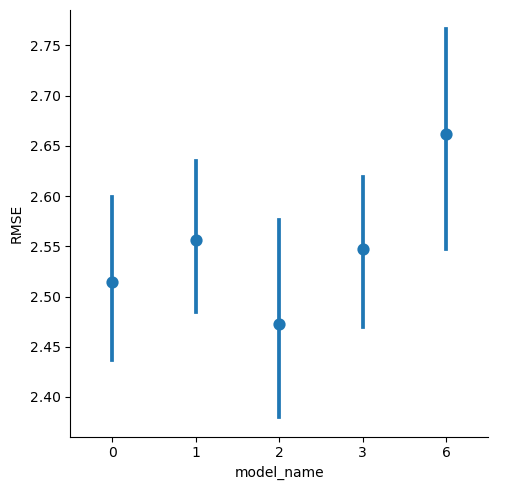

In [156]:
sns.catplot(data=cv_score_df2.loc[(cv_score_df2.model_name != 4) & (cv_score_df2.model_name != 5) & (cv_score_df2.model_name != 7) & (cv_score_df2.model_name != 8),:], x='model_name', y='RMSE', kind='point', join=False, errorbar=('ci',68))
plt.show()

In [157]:
cv_score_df2_g=cv_score_df2.groupby(['model_name']).\
aggregate(rsq_avg = ('R-squared','mean'),
         rmse_avg = ('RMSE','mean')).\
reset_index()

In [158]:
cv_score_df2_g.sort_values(by=['rsq_avg'],ascending=False)

,model_name,rsq_avg,rmse_avg
2,2,-8.208619e-03,2.472982e+00
0,0,-4.104561e-02,2.514136e+00
3,3,-7.848816e-02,2.547311e+00
1,1,-8.539111e-02,2.556513e+00
6,6,-1.709116e-01,2.661521e+00
4,4,-8.687714e-01,3.120183e+00
7,7,-3.769258e+18,1.392867e+09
8,8,-1.665488e+21,6.164355e+10
5,5,-5.472605e+23,1.050500e+12


In [159]:
cv_score_df2_g.sort_values(by=['rmse_avg'],ascending=True)

,model_name,rsq_avg,rmse_avg
2,2,-8.208619e-03,2.472982e+00
0,0,-4.104561e-02,2.514136e+00
3,3,-7.848816e-02,2.547311e+00
1,1,-8.539111e-02,2.556513e+00
6,6,-1.709116e-01,2.661521e+00
4,4,-8.687714e-01,3.120183e+00
7,7,-3.769258e+18,1.392867e+09
8,8,-1.665488e+21,6.164355e+10
5,5,-5.472605e+23,1.050500e+12


Considering all given models, model 2: 'y ~ xo1 + xo2 + xo3 + xo4 + xo5 + xo6 + xo7 + xo8 + xo9 + xo10' is STILL the best model.